In [26]:
import pandas as pd
import numpy as np

df = pd.read_csv('trainable.csv')

In [27]:
df.head()

,enrollment,duration,phase_encoded,condition_encoded,intervention_type_encoded,study_design_encoded,sponsor_type_encoded,gender_encoded,location_encoded,masking_encoded,final_status
0,276.0,2009.000000,3,238,6,1,3,0,1179,2,1
1,53.0,992.442074,1,5511,6,1,3,0,1179,1,1
2,371.0,1096.000000,5,1405,6,1,3,0,1179,1,1
3,20.0,974.000000,3,3424,6,1,6,0,533,1,1
4,58.0,2130.000000,2,3001,6,0,5,1,1077,1,1


In [28]:
from sklearn.model_selection import train_test_split

X = df.drop('final_status', axis=1)
y = df['final_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200]
}

# Initialize Logistic Regression
logreg = LogisticRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)



/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200],
                         'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [30]:
# Best estimator after hyperparameter tuning
best_logreg = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}


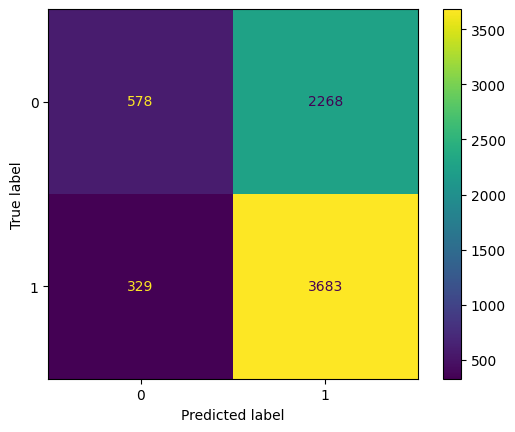

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [32]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6213181685622631
              precision    recall  f1-score   support

           0       0.64      0.20      0.31      2846
           1       0.62      0.92      0.74      4012

    accuracy                           0.62      6858
   macro avg       0.63      0.56      0.52      6858
weighted avg       0.63      0.62      0.56      6858



AUC-ROC Score: 0.6650


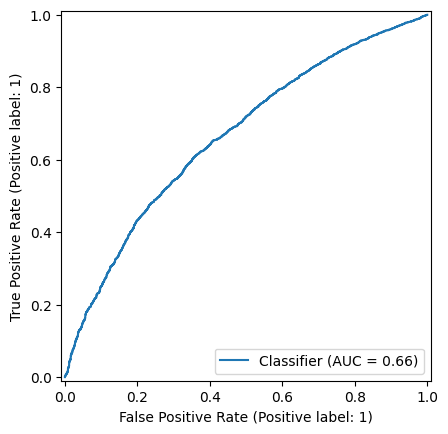

In [33]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# Get predicted probabilities for the positive class
y_proba = best_logreg.predict_proba(X_test)[:, 1]

# Plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_proba)

# Calculate and print AUC-ROC score
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC Score: {auc_score:.4f}")

In [34]:
from sklearn.metrics import classification_report

with open("model_evaluation.txt", "w") as f:

    # Write classification report
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_pred))
    f.write("\n\n")

    # Write confusion matrix
    f.write("Confusion Matrix:\n")
    f.write(str(cm))
    f.write("\n\n")

    # Write AUC-ROC score
    f.write(f"AUC-ROC Score: {auc_score:.4f}\n")

In [35]:
import pickle

# Save the best logistic regression model to a pickle file
with open("best_logreg_model.pkl", "wb") as model_file:
    pickle.dump(best_logreg, model_file)

In [36]:
import tarfile

# List of files to include in the tar archive
files_to_tar = ["model_evaluation.txt", "best_logreg_model.pkl"]

with tarfile.open("model_outputs.tar.gz", "w:gz") as tar:
    for file in files_to_tar:
        tar.add(file)